# header file included

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

print('done')

done


# data loading

In [3]:
data = pd.read_csv('preprocessed_data.csv')
data.head()

,Video id,Title,Description,Category
0,DU1BEo2GlnM,day gulftain missil travel iran ferri,https www timesofisrael com former mk say iran...,travel
1,XatWIV-bWnA,travel hack collab heyitsjemma,hey hope guy enjoy know video bit differ fit h...,travel
2,p0-Sa6hK9ZU,kh nh linh travel h ng th ng gia bamboo airway...,kh nh linh travel vlog h ng th ng gia bamboo a...,travel
3,egjqs_6zvno,best video lefkada holiday greec travel drone ...,subskrybuj j kana instagram https www instagra...,travel
4,abH6pFIp--Y,vlog travel pack storm new addict matur beauti...,hectic week pack teach get pedicur get easter ...,travel


In [4]:
data.dropna(inplace=True)

In [5]:
data.shape

(1868, 4)

# dropping 'Video id' column

In [6]:
# dropping 'Video id' columns as it is not needed
data = data.drop('Video id', axis=1)
data.head(5)

,Title,Description,Category
0,day gulftain missil travel iran ferri,https www timesofisrael com former mk say iran...,travel
1,travel hack collab heyitsjemma,hey hope guy enjoy know video bit differ fit h...,travel
2,kh nh linh travel h ng th ng gia bamboo airway...,kh nh linh travel vlog h ng th ng gia bamboo a...,travel
3,best video lefkada holiday greec travel drone ...,subskrybuj j kana instagram https www instagra...,travel
4,vlog travel pack storm new addict matur beauti...,hectic week pack teach get pedicur get easter ...,travel


# label conversion

In [7]:
data['Category'] = data.Category.map({'travel':0, 'science':1, 'food':2, 'manufacturing':3, 'history':4, 'art':5})
data.tail(5)

,Title,Description,Category
1865,element lindsey stirl dubstep violin origin song,pick copi delux edit lindsey christma album wa...,5
1866,bebe rexha mess offici music video,new singl debut album expect https beberexha i...,5
1867,medicin queen naija offici video,self titl ep featur karma medicin listen http ...,5
1868,post malon go flex,go flex offici video download today http repub...,5
1869,alan walker differ world feat sofia carson k c...,walker excit final releas new singl differ wor...,5


# combining 'Title' and 'Description' into one column 'TitleDescription'

In [8]:
data['TitleDesciption'] = data['Title']+ ' ' + data['Description']
data.head()

,Title,Description,Category,TitleDesciption
0,day gulftain missil travel iran ferri,https www timesofisrael com former mk say iran...,0,day gulftain missil travel iran ferri https ww...
1,travel hack collab heyitsjemma,hey hope guy enjoy know video bit differ fit h...,0,travel hack collab heyitsjemma hey hope guy en...
2,kh nh linh travel h ng th ng gia bamboo airway...,kh nh linh travel vlog h ng th ng gia bamboo a...,0,kh nh linh travel h ng th ng gia bamboo airway...
3,best video lefkada holiday greec travel drone ...,subskrybuj j kana instagram https www instagra...,0,best video lefkada holiday greec travel drone ...
4,vlog travel pack storm new addict matur beauti...,hectic week pack teach get pedicur get easter ...,0,vlog travel pack storm new addict matur beauti...


# train_test_split (train:test - 80:20) 

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['TitleDesciption'], data.Category, test_size=0.2,random_state=1)

x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values
print('done')

done


In [10]:
print(x_train.shape)
x_train

(1494,)


array([ 'singapor travel diari part univers studio river safari yay final upload favorit part singapor trip univers studio river safari everi singl day feel',
       'scienc persuas http www influenceatwork com anim video describ six univers principl persuas',
       'young turk largest onlin news show world host cenk uygur ana kasparian live weekday pm et young turk n',
       ...,
       'lil wayn cri ft xxxtentacion cri ft xxxtentact offici video happi birthday xxxtentacionth world miss u slime',
       'nelli dream offici music video music video nelli perform dream c univers motown record divis umg record inc nelli',
       'jim yosef courag feat anna yvett lyric copyright sound enjoy video hit like share subscrib'], dtype=object)

In [11]:
print(x_test.shape)
x_test

(374,)


array([ 'peppa pig offici channel peppa live mummi daddi littl brother georg adventur fun sometim involv tear',
       'dust dust first multi platform destin bing watchabl sci fi featur scienc fiction short film content',
       'art class elsa anna toddler school barbi teacher paint color toy doll parodi video show toddler anna elsa art class school paint use beauti color',
       'voic best blind audit ever histori hey thank lot watch make happiest person subscrib channel peopl',
       'cinderella english stori english fairi tale cinderella english stori english stori fairi tale english bedtim stori fairi tale english stori k uhd',
       'nation geograph inspir peopl care planet nation geograph world premium destin scienc explor',
       'halal street food tour mumbai india muhammad ali road mega size indian food https www youtub com watch v sfskzqgmjo learn onetrip tour',
       'start monet day nagpur daili vlog vlog ani ray start monet day nagpur daili vlog vlog ani ray howtosta

In [12]:
print(len(y_train))
print(y_train)
print(len(y_test))
print(y_test)

1494
[0 1 4 ..., 3 0 3]
374
[1 1 5 4 4 4 2 2 1 1 0 1 0 5 2 2 3 0 0 3 5 5 2 2 4 4 0 5 5 0 5 1 5 0 0 0 2
 3 2 3 3 2 5 3 1 2 4 4 3 1 0 2 4 2 1 5 2 4 2 1 0 1 1 3 3 0 4 3 4 4 3 0 0 3
 0 5 1 0 5 3 2 2 4 2 2 3 3 2 5 4 1 5 3 3 2 4 0 5 4 5 2 2 5 2 1 3 2 5 3 5 0
 4 3 5 3 4 4 0 1 2 2 2 5 1 3 4 3 0 5 2 4 5 3 0 5 1 5 0 2 4 2 3 5 5 0 5 4 1
 1 0 3 1 5 1 5 0 5 2 3 4 0 3 3 4 0 2 5 0 1 1 0 4 0 2 5 2 0 2 4 4 3 0 1 5 2
 2 1 3 3 3 5 1 4 0 1 5 0 5 1 3 0 4 3 3 3 3 3 4 2 5 4 3 4 5 3 4 0 3 3 3 3 1
 0 2 2 3 0 3 1 1 5 1 0 0 0 5 0 5 5 1 3 2 4 5 1 2 3 0 5 0 3 0 0 4 2 5 1 0 1
 0 1 5 1 3 3 2 0 4 2 4 2 3 1 0 3 2 2 2 1 4 5 3 5 4 1 5 2 4 2 0 3 1 3 3 5 1
 1 5 5 2 3 2 2 1 5 5 0 2 2 5 3 0 3 0 1 0 2 4 3 2 1 3 4 0 1 4 0 5 5 2 4 1 3
 4 2 0 1 4 2 0 2 1 0 3 2 4 5 4 3 5 2 2 3 5 3 4 0 3 1 1 5 4 5 5 4 3 0 0 3 4
 2 2 0 4]


In [73]:
# x_trai = x_train.values
# print(x_trai)

# techniques

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.float64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [15]:
x_train_vec = vectorizer.transform(x_train)
print(x_train_vec.shape)
# print(x_train_vec)

(1494, 5055)


In [16]:
x_test_vec = vectorizer.transform(x_test)
print(x_test_vec.shape)
# print(x_test_vec)

(374, 5055)


# evaluation matric function

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(confusion_mat):
    sb.heatmap(confusion_mat, annot=True, fmt='g')
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.title('Confusion matrix')
    plt.show()
    
    
    
def evaluation_metric(y_test, pred):
    
    accuracy = accuracy_score(y_test, pred)
    print 'Accuracy: '+str(accuracy)
    
#     print 'Recall: '+str(recall_score(y_test, pred))
#     print 'Precision: '+str(precision_score(y_test, pred))
#     print 'f1_score: '+str(f1_score(y_test, pred))

    print 'classificatoin report'
    print classification_report(y_test, pred)
    
    # confusion matrix visualisation
    from sklearn.metrics import confusion_matrix
    confusion_mat = confusion_matrix(pred, y_test)
    print confusion_mat
    plot_confusion_matrix(confusion_mat)
    
    

# MultinomialNB

In [18]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [19]:
clf.fit(x_train_vec, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
pred = clf.predict(x_test_vec)
print(pred)

[5 1 5 0 4 1 2 2 0 1 4 1 5 2 2 2 3 1 0 1 5 5 2 5 4 5 3 0 5 5 5 1 3 0 0 0 2
 3 2 1 3 2 3 5 1 2 4 4 3 1 3 2 5 2 4 5 2 4 2 1 0 1 1 3 1 0 4 3 4 5 3 0 0 3
 3 0 1 4 3 3 2 2 4 2 2 3 3 2 5 1 3 3 1 1 2 4 1 5 3 5 2 1 5 2 1 3 2 4 5 5 0
 4 3 5 3 3 5 0 1 2 2 2 5 1 3 4 3 0 3 2 5 5 3 3 2 1 5 0 4 4 2 3 5 5 0 5 4 3
 4 0 1 1 5 1 5 0 5 2 3 5 0 5 5 4 0 2 5 5 1 3 0 3 0 2 5 2 0 2 4 2 3 0 1 3 2
 2 1 3 1 1 2 1 5 1 1 5 0 5 1 5 5 4 5 5 1 5 3 1 2 5 4 5 1 5 3 0 0 3 3 3 3 1
 0 2 2 3 1 3 1 1 5 1 0 2 0 3 0 5 5 1 0 2 4 0 1 2 3 0 4 0 3 5 0 1 2 0 1 0 1
 1 1 5 1 2 5 2 0 3 2 4 2 3 1 4 2 2 2 2 1 5 5 3 3 5 1 5 2 5 2 0 3 1 4 3 5 1
 3 5 5 2 1 2 2 1 5 5 0 2 2 5 3 0 5 0 1 0 2 5 3 2 4 3 4 0 1 4 0 5 5 2 4 1 4
 5 2 3 1 4 2 3 2 1 3 3 2 4 2 4 3 5 2 2 3 5 2 4 0 3 1 1 5 2 5 5 5 3 0 2 3 4
 2 2 0 4]


Accuracy: 0.719251336898
classificatoin report
              precision    recall  f1-score   support

           0       0.84      0.66      0.74        64
           1       0.68      0.83      0.75        54
           2       0.85      0.96      0.90        67
           3       0.66      0.62      0.64        71
           4       0.72      0.52      0.60        54
           5       0.60      0.72      0.65        64

   micro avg       0.72      0.72      0.72       374
   macro avg       0.72      0.72      0.71       374
weighted avg       0.73      0.72      0.72       374

[[42  1  0  1  2  4]
 [ 5 45  1 10  5  0]
 [ 2  0 64  3  2  4]
 [ 7  4  0 44  4  8]
 [ 3  3  1  2 28  2]
 [ 5  1  1 11 13 46]]


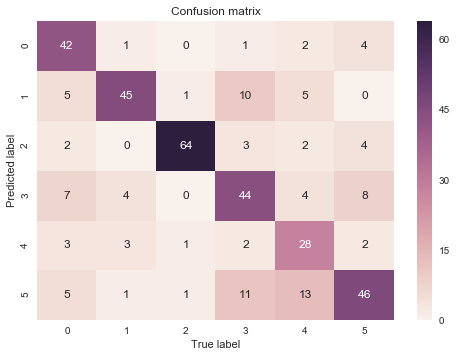

In [41]:
evaluation_metric(y_test, pred)

# random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_estimators=250, max_depth=5, random_state=0)

In [33]:
rdf.fit(x_train_vec, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [38]:
pred_rdf = rdf.predict(x_test_vec)
print(pred_rdf)

[3 3 5 3 4 1 2 0 3 1 4 1 3 3 2 2 3 3 0 1 3 0 2 2 3 3 3 3 5 2 5 1 3 3 0 0 2
 3 2 1 3 2 3 3 1 2 3 3 3 1 2 2 3 2 3 3 2 3 2 1 3 1 1 3 1 3 4 3 3 3 3 0 0 3
 3 3 3 3 3 3 2 2 3 3 2 4 3 2 5 3 3 3 3 1 2 3 1 4 3 3 2 3 3 2 1 3 2 3 3 5 0
 3 3 5 3 4 3 0 1 2 2 2 3 3 3 4 3 0 3 2 3 5 3 3 3 1 5 4 3 4 0 3 3 5 0 5 4 3
 3 0 1 1 3 1 5 3 3 2 3 3 0 3 3 4 0 2 5 3 1 3 3 3 0 2 5 2 3 2 3 4 3 0 1 3 2
 2 1 3 3 3 5 1 3 0 1 5 0 5 1 3 3 4 3 3 1 3 3 1 2 5 4 3 3 5 3 4 0 3 3 3 3 1
 0 2 2 3 1 3 1 1 5 1 0 3 0 3 3 3 3 1 3 2 4 3 1 2 3 0 4 0 3 3 0 3 2 3 1 3 1
 3 1 5 3 3 3 2 0 4 2 3 2 3 1 3 3 3 2 2 1 3 5 3 3 3 1 5 2 4 2 0 3 3 3 3 5 1
 3 3 3 2 1 3 2 1 5 3 0 2 2 5 1 0 3 3 1 0 2 3 3 2 3 3 4 0 1 4 0 3 5 2 3 1 3
 5 3 0 1 4 2 0 2 1 3 3 2 4 3 4 3 5 2 2 3 3 3 4 0 3 1 1 5 3 5 5 3 3 0 2 3 4
 2 2 0 3]


Accuracy: 0.660427807487
classificatoin report
              precision    recall  f1-score   support

           0       0.92      0.55      0.69        64
           1       0.77      0.74      0.75        54
           2       0.95      0.88      0.91        67
           3       0.38      0.87      0.53        71
           4       0.81      0.39      0.53        54
           5       0.97      0.47      0.63        64

   micro avg       0.66      0.66      0.66       374
   macro avg       0.80      0.65      0.67       374
weighted avg       0.79      0.66      0.67       374

[[35  0  2  0  0  1]
 [ 2 40  0  8  2  0]
 [ 3  0 59  0  0  0]
 [22 14  6 62 30 31]
 [ 2  0  0  1 21  2]
 [ 0  0  0  0  1 30]]


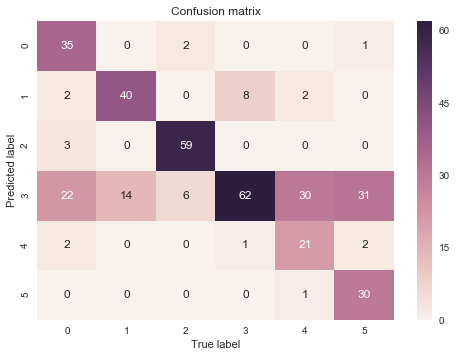

In [42]:
evaluation_metric(y_test, pred_rdf)